# Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

2021

**$Mini$-$Proyecto$ $1$**

Manuel José Bothert Martínez. Yeison Monsalve Sanchez. Juan Manuel Marín Gallego


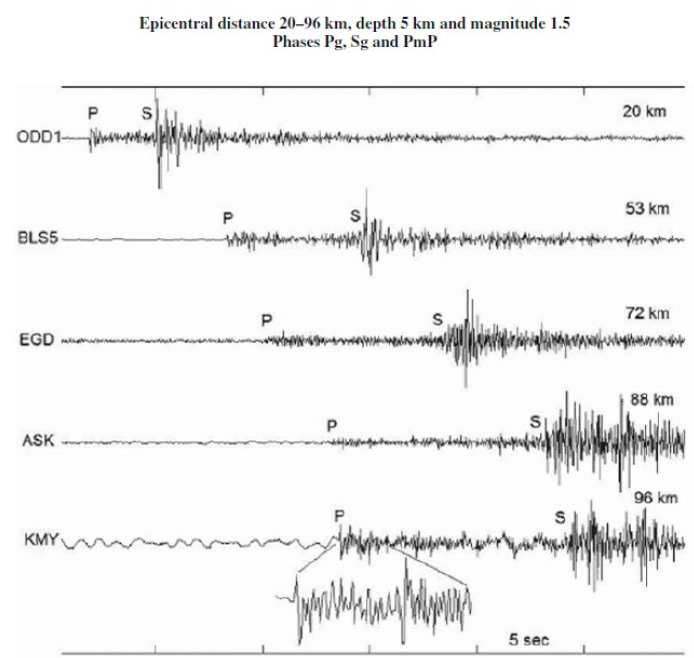

Los observatorios sismológicos clasifican las señales sísmicas de acuerdo a la diferencia de tiempo de arribo entre la onda P y la onda S, conocida como S-P. La S-P, es una indicación de la distancia que existe desde el punto donde se genera el sismo al punto donde se encuentra la estación que lo registra, es decir de la distancia epicentral. Dicho parámetro, aplicado a las señales registradas
por el OSQ permite definir tres tipos de sismos: local, caracterizado por tener una S-P menor a 20 s; regional cuya S-P varía entre 20 s y 180 s y telesismo, cuya S-P es mayor 180 s.

In [1]:
!pip install pyts

     |████████████████████████████████| 2.5MB 23.9MB/s 


In [ ]:
#!wget 'https://github.com/hernanfgarcia/TSIII_20211/blob/main/sisLoc.mat'
#!wget 'https://github.com/hernanfgarcia/TSIII_20211/blob/main/sisTele.mat'
#!wget 'https://github.com/hernanfgarcia/TSIII_20211/blob/main/sisReg.mat'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd       
import seaborn as sns              
import scipy.io as sc
from pyts.decomposition import SingularSpectrumAnalysis
from scipy.signal import stft, bode, butter, lfilter, freqz

(Text(0.5, 0, 'sample'), Text(0, 0.5, '$\\mu$ V'))

<Figure size 432x288 with 0 Axes>

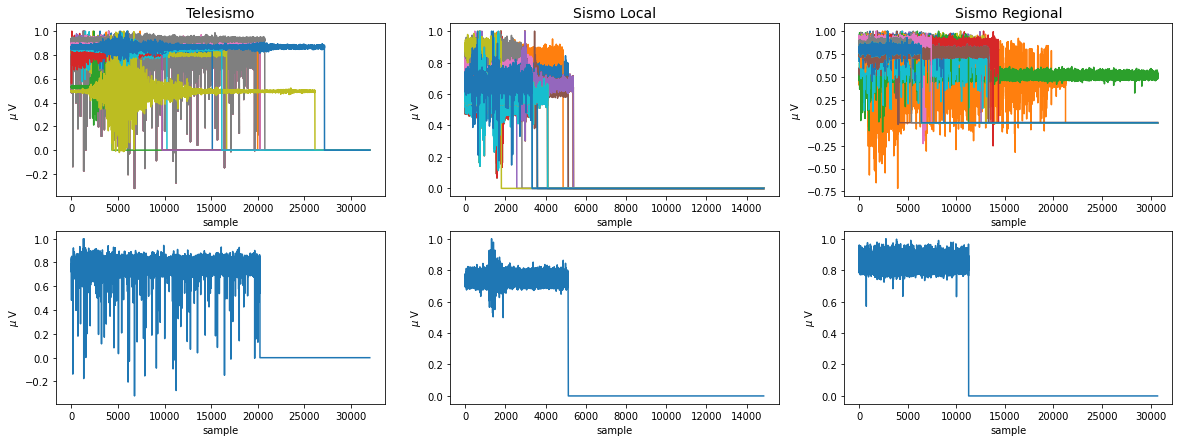

In [27]:
data = sc.loadmat('/content/gdrive/MyDrive/MiniProyecto1/sisTele.mat')
data.keys() # variables del diccionario
TeleSignal = data['Y']
fs = data['fs']
plt.figure()
plt.figure(figsize=(20,7))
plt.subplot(2, 3, 1)
plt.plot(TeleSignal.T)
plt.title("Telesismo", fontsize=14), plt.xlabel('sample'), plt.ylabel('$\mu$ V')

data = sc.loadmat('/content/gdrive/MyDrive/MiniProyecto1/sisLoc.mat')
data.keys() # variables del diccionario
LocSignal = data['Y']
plt.subplot(2, 3, 2)
plt.plot(LocSignal.T)
plt.title("Sismo Local", fontsize=14), plt.xlabel('sample'), plt.ylabel('$\mu$ V')

data = sc.loadmat('/content/gdrive/MyDrive/MiniProyecto1/sisReg.mat')
data.keys() # variables del diccionario
RegSignal = data['Y']
plt.subplot(2, 3, 3)
plt.plot(RegSignal.T)
plt.title("Sismo Regional", fontsize=14), plt.xlabel('sample'), plt.ylabel('$\mu$ V')

idSignal = 0 #Identificador de la señal seleccionada (de las 21).
plt.subplot(2, 3, 4)
plt.plot(TeleSignal[idSignal,:])
plt.xlabel('sample'), plt.ylabel('$\mu$ V')

plt.subplot(2, 3, 5)
plt.plot(LocSignal[idSignal,:])
plt.xlabel('sample'), plt.ylabel('$\mu$ V')

plt.subplot(2, 3, 6)
plt.plot(RegSignal[idSignal,:])
plt.xlabel('sample'), plt.ylabel('$\mu$ V')

In [28]:
#Funciones para la implementación del filtro pasabandas.
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

<Figure size 432x288 with 0 Axes>

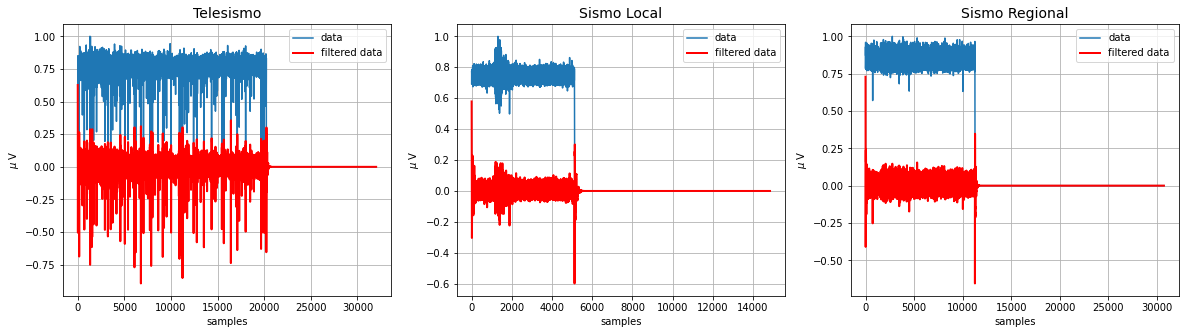

In [29]:
#Requisitos del filtro.
order = 6 #Orden del filtro.
fs = 100.0 #Frecuencia de muestreo, Hz.
cutoff1 = 49.5 #Highcut, Hz.
cutoff2 = 1 #Lowcut, Hz.

#Generamos matrices para almacenar las señales filtradas.
TeleSignalFiltered = np.zeros( (21, 32000) )
LocSignalFiltered = np.zeros( (21, 14848) )
RegSignalFiltered = np.zeros( (21, 30720) )

#Filtramos las señales.
for i in range(0, 21):
  TeleSignalFiltered[i,:] = butter_bandpass_filter(TeleSignal[i,:], cutoff2, cutoff1, fs, order)
  LocSignalFiltered[i,:] = butter_bandpass_filter(LocSignal[i,:], cutoff2, cutoff1, fs, order)
  RegSignalFiltered[i,:] = butter_bandpass_filter(RegSignal[i,:], cutoff2, cutoff1, fs, order)

#Graficamos la señal origilan y la señal filtrada.
idSignal = 0 #Identificador de la señal seleccionada (de las 21).
plt.figure()
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1), plt.plot(TeleSignal[idSignal,:], label='data');
plt.subplot(1, 3, 1), plt.plot(TeleSignalFiltered[idSignal,:], 'r-', linewidth=2, label='filtered data');
plt.title("Telesismo", fontsize=14), plt.xlabel('samples'), plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2), plt.plot(LocSignal[idSignal,:], label='data');
plt.subplot(1, 3, 2), plt.plot(LocSignalFiltered[idSignal,:], 'r-', linewidth=2, label='filtered data');
plt.title("Sismo Local", fontsize=14), plt.xlabel('samples'), plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3), plt.plot(RegSignal[idSignal,:], label='data');
plt.subplot(1, 3, 3), plt.plot(RegSignalFiltered[idSignal,:], 'r-', linewidth=2, label='filtered data');
plt.title("Sismo Regional", fontsize=14), plt.xlabel('samples'), plt.ylabel('$\mu$ V')
plt.grid()
plt.legend()

Se pueden apreciar claramente los efectos del filtro implementado sobre los datos originales, ya que claramente podemos apreciar la eliminación de algunas componentes de alta frecuencia (especialmente en la gráfica del telesismo), así como tambien podemos ver que se elimina el nivel dc propio de las señales originales.

<Figure size 432x288 with 0 Axes>

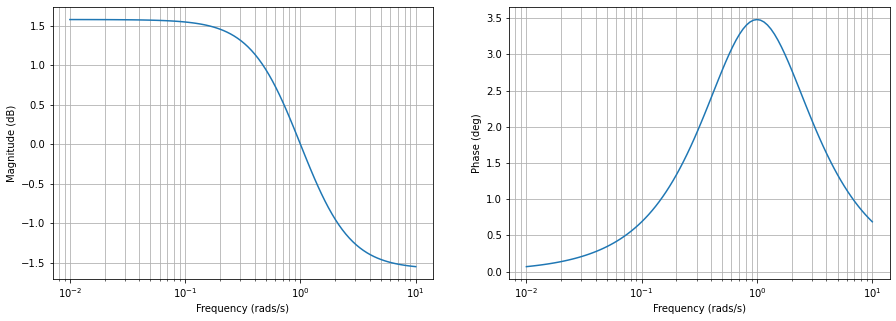

In [30]:
b, a = butter_bandpass(cutoff2, cutoff1, fs, order)
sys = (b, a)
w, mag, phase = bode(sys)

plt.figure()
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.semilogx(w, mag) #Bode magnitude plot, bandpass.
plt.xlabel('Frequency (rads/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")

plt.subplot(1, 2, 2)
plt.semilogx(w, phase) #Bode phase plot, bandpass.
plt.xlabel('Frequency (rads/s)') 
plt.ylabel('Phase (deg)')
plt.grid(True, which="both")

A partir de los diagramas que se pueden observar en la figura anterior, justificamos la escogencia del filtro butterworth pasabandas generado mediante "scipy.signal.butter", ya que podemos apreciar que la banda de paso y la banda de parada se distinguen claramente, la atenuación propia del filtro no es de una magnitud muy grande que genere la perdida de información importante y la diferencia de fase con respecto a la frecuencia no es de un valor lo suficientemente significativo como para generar alteraciones en la señal filtrada.

## Generamos las señales subyacentes (SSA).

### IMPORTANTE: 
Todo el código que sigue, se ve afectado por el valor de la variable groups ya que esta define la cantidad de señales subyacentes que se utilizarán en la implementación, por lo cual se recomienda tratar esta variable con precaución, ya que aumentar mucho el valor del misma incrementará de manera muy notoria el tiempo de ejecución del código.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

<Figure size 432x288 with 0 Axes>

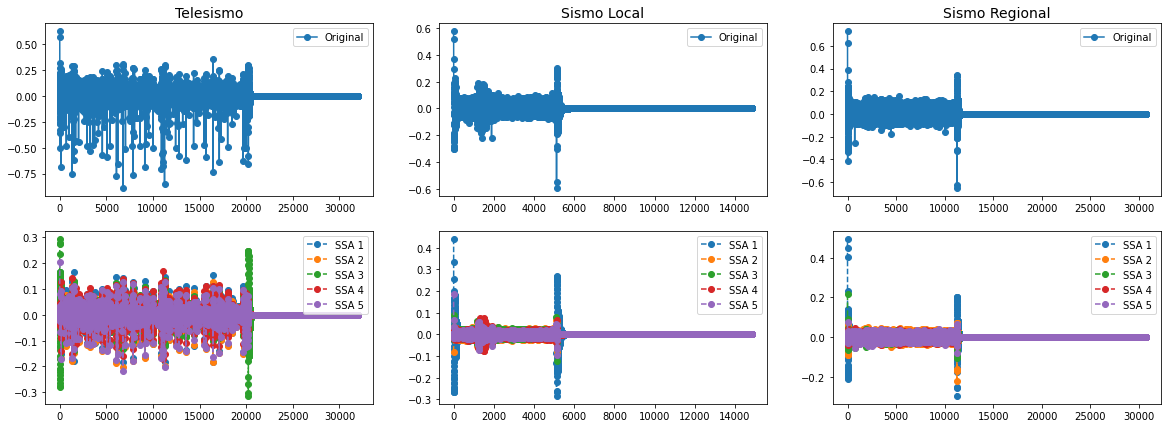

In [31]:
groups = 5 #Conjunto de señales subyacentes. Se puede cambiar el valor de esta variable para visualizar los efectos de utilizar mas o menos SSA's.
ssa = SingularSpectrumAnalysis(window_size=groups) #Singular Spectrum Analysis.

#Creamos las matrices con las nuevas señales subyacentes para cada conjunto de señales.
Tele_ssa = ssa.fit_transform(TeleSignalFiltered) 
Loc_ssa = ssa.fit_transform(LocSignalFiltered) 
Reg_ssa = ssa.fit_transform(RegSignalFiltered)

#Graficamos la señal origilan y las subseñales generadas.
idSignal = 0 #Identificador de la señal seleccionada (de las 21).
plt.figure()
plt.figure(figsize=(20,7))
plt.subplot(2, 3, 1), plt.plot(TeleSignalFiltered[idSignal], 'o-', label='Original'), plt.title("Telesismo", fontsize=14), plt.legend(loc='best')
plt.subplot(2, 3, 2), plt.plot(LocSignalFiltered[idSignal], 'o-', label='Original'), plt.title("Sismo Local", fontsize=14), plt.legend(loc='best')
plt.subplot(2, 3, 3), plt.plot(RegSignalFiltered[idSignal], 'o-', label='Original'), plt.title("Sismo Regional", fontsize=14), plt.legend(loc='best')

for i in range(groups):
    plt.subplot(2, 3, 4), plt.plot(Tele_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1)), plt.legend(loc='best')
    plt.subplot(2, 3, 5), plt.plot(Loc_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1)), plt.legend(loc='best')
    plt.subplot(2, 3, 6), plt.plot(Reg_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1)), plt.legend(loc='best')

Podemos apreciar que efectivamente se está consiguiendo descomponer la señal original en un conjunto de subseñales que pueden aportar información importante a la hora de realizar el proceso de extracción de las características, lo cual nos acerca un poco mas a la posibilidad de obtener un modelo que represente los datos de manera organizada y que nos permita distinguir los diferentes tipos de sismos.

## Generamos las stft's y graficamos los espectros.

<Figure size 432x288 with 0 Axes>

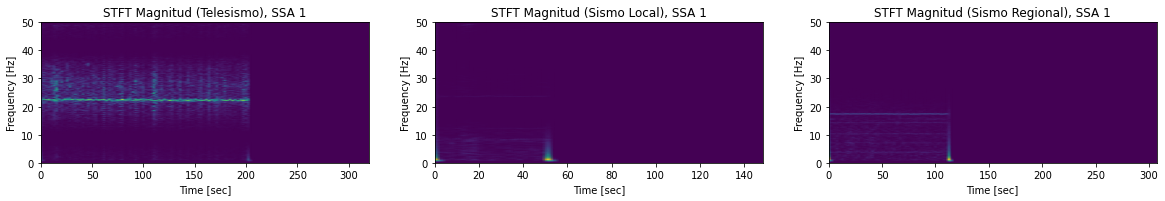

<Figure size 432x288 with 0 Axes>

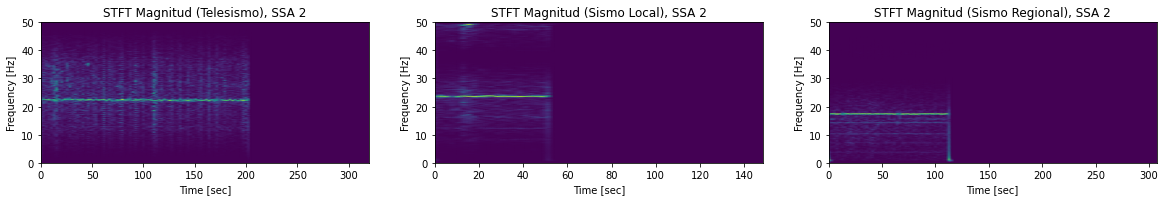

<Figure size 432x288 with 0 Axes>

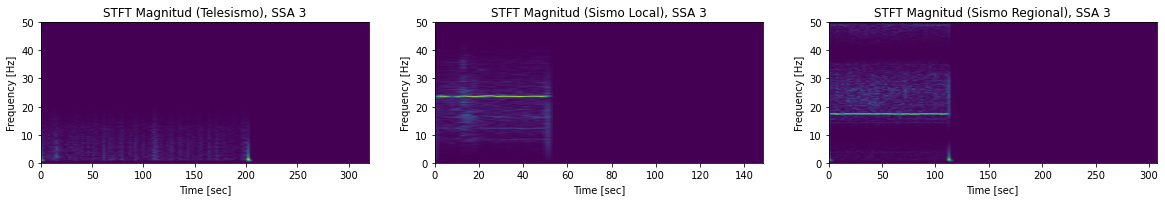

<Figure size 432x288 with 0 Axes>

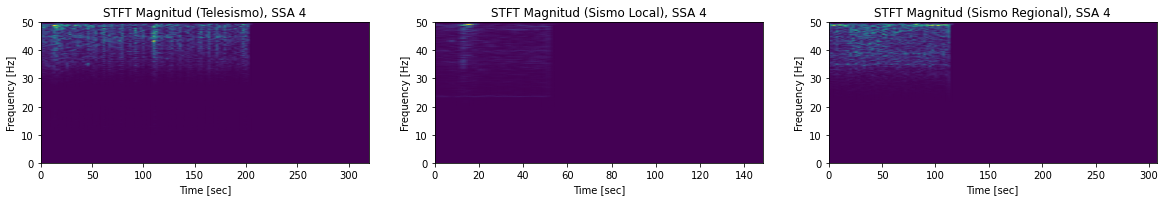

<Figure size 432x288 with 0 Axes>

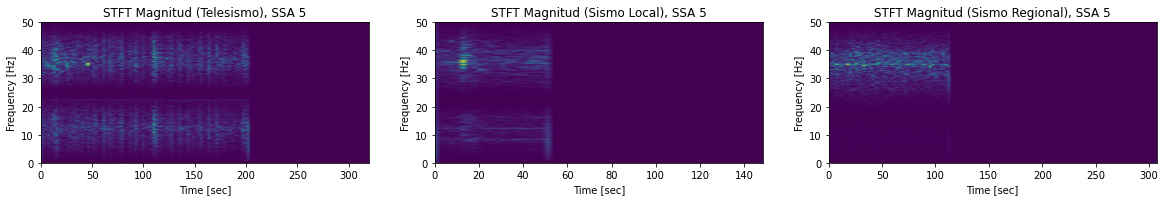

In [32]:
aux=[0]*groups
for i in range(0, groups):
  aux[i]=i*3

idSignal = 0 #Identificador de la señal seleccionada (de las 21).

#Calculemos la STFT
from scipy import signal
for i in range(0, groups):
  Tele_f, Tele_t, Tele_Zxx = signal.stft(Tele_ssa[idSignal,i], fs, nperseg=512)
  Tele_absZxx = np.abs(Tele_Zxx)
  Loc_f, Loc_t, Loc_Zxx = signal.stft(Loc_ssa[idSignal,i], fs, nperseg=512)
  Loc_absZxx = np.abs(Loc_Zxx)
  Reg_f, Reg_t, Reg_Zxx = signal.stft(Reg_ssa[idSignal,i], fs, nperseg=512)
  Reg_absZxx = np.abs(Reg_Zxx)

#Graficamos los espectros de las señales subyacentes generadas para cada tipo de sismo (a partir del identificador de la señal seleccionada).
  plt.figure()
  plt.figure(figsize=(20,15))
  plt.subplot(groups, 3, 1+aux[i]), plt.pcolormesh(Tele_t, Tele_f, Tele_absZxx, shading='gouraud') 
  plt.title('STFT Magnitud (Telesismo), SSA {0}'.format(i + 1)), plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')
  plt.subplot(groups, 3, 2+aux[i]), plt.pcolormesh(Loc_t, Loc_f, Loc_absZxx, shading='gouraud')
  plt.title('STFT Magnitud (Sismo Local), SSA {0}'.format(i + 1)), plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')
  plt.subplot(groups, 3, 3+aux[i]), plt.pcolormesh(Reg_t, Reg_f, Reg_absZxx, shading='gouraud')
  plt.title('STFT Magnitud (Sismo Regional), SSA {0}'.format(i + 1)), plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [sec]')

A partir de las graficas obtenidas, podemos observar que el comportamiento de las SSA's es el esperado, ya que estas señales, aunque parecidas, tienen pequeñas diferencias entre sí, las cuales nos pueden servir para extraer información que puede ser útil para realizar la representación y posible clasificación de los tipos de sismos.

También podemos analizar que los espectrogramas obtenidos mediante la STFT van a permitirnos analizar los cambios de señales no estacionarias. Algunos de estos cambios son apreciables a simple vista, por ejemplo, la SSA 5 nos permite observar claramente la distribución de las frecuencias en el tiempo para los 3 tipos de sismos, donde vemos que el telesismo tiene una larga duración con frecuencias similares, el sismo local es de corta duración con picos de intensidad en algunas frecuencias y el sismo regional es de una duración intermedia con frecuencias similares.



In [33]:
#Funcion para el cálculo de la energía.
def signalEnergy(signalInput):  
  sum = 0
  for k in range(len(signalInput)):
    sum+=pow(signalInput[k],2)     
  sigEnergy = sum
  return sigEnergy 

In [34]:
#Funcion para la extracción de características.
def extract_features(Zxx, f, ssa):
  absZxx = np.abs(Zxx)
  maxP = np.max(absZxx)
  id = np.where(absZxx==maxP)
  frecPmax = np.squeeze(f[id[0]])
  energy=signalEnergy(ssa)
  maxF = np.max(absZxx,axis=1)
  meanP = np.mean(maxF)
  varP = np.var(maxF)
  maxSpectrum = np.max(maxF)
  minSpectrum = np.min(maxF)

  dataRow = np.random.rand(7) #Creamos un ndarray de tamaño 7, el cual almacenará las características.
  #Enviamos las características de manera organizada a las posiciones correspondientes del ndarray creado.
  dataRow[0]=maxP
  dataRow[1]=frecPmax
  dataRow[2]=energy
  dataRow[3]=meanP 
  dataRow[4]=varP 
  dataRow[5]=maxSpectrum 
  dataRow[6]=minSpectrum 
 
  return dataRow

In [35]:
Tele_f, Tele_t, Tele_Zxx = signal.stft(Tele_ssa[0,0], fs, nperseg=512)
dataRow = extract_features(Tele_Zxx, Tele_f, Tele_ssa[0,0])
print('Potencia máxima: ',dataRow[0])
print('Frecuencia en la potencia máxima: ',dataRow[1],' Hz')
print('Energia: ',dataRow[2])
print('Media: ',dataRow[3])
print('Varianza: ',dataRow[4])
print('Máximo del espectro: ',dataRow[5])
print('Mínimo del espectro: ',dataRow[6])

TeleMatrix = np.zeros( (21,7*groups) )
LocMatrix = np.zeros( (21,7*groups) )
RegMatrix = np.zeros( (21,7*groups) )

#Creamos un ciclo for que recorre las 21 señales.
for idSignal in range(0, 21):

#Creamos ndarrays que serán llenados con las características extraidas, fila a fila.
  dataRowTele = np.zeros( (0, 0) ) 
  dataRowLoc = np.zeros( (0, 0) )
  dataRowReg = np.zeros( (0, 0) )

#Creamos un ciclo for que recorre los i grupos.
  for i in range(0, groups):
    Tele_f, Tele_t, Tele_Zxx = signal.stft(Tele_ssa[idSignal,i], fs, nperseg=512) 
    featuresTele = extract_features(Tele_Zxx, Tele_f, Tele_ssa[idSignal,i]) #Extraemos características para el telesismo de la señal idSignal, subgrupo i.
    dataRowTele = np.append(dataRowTele, featuresTele) #Concatenamos las características de los subgrupos del telesismo idSignal, en una sola fila. 

    Loc_f, Loc_t, Loc_Zxx = signal.stft(Loc_ssa[idSignal,i], fs, nperseg=512)
    featuresLoc = extract_features(Loc_Zxx, Loc_f, Loc_ssa[idSignal,i]) #Extraemos características para el sismo local de la señal idSignal, subgrupo i.
    dataRowLoc = np.append(dataRowLoc, featuresLoc) #Concatenamos las características de los subgrupos del sismo local idSignal, en una sola fila. 

    Reg_f, Reg_t, Reg_Zxx = signal.stft(Reg_ssa[idSignal,i], fs, nperseg=512)
    featuresReg = extract_features(Reg_Zxx, Reg_f, Reg_ssa[idSignal,i]) #Extraemos características para el sismo regional de la señal idSignal, subgrupo i.
    dataRowReg = np.append(dataRowReg, featuresReg) #Concatenamos las características de los subgrupos del sismo regional idSignal, en una sola fila. 
  
  TeleMatrix[idSignal:]= dataRowTele #Construimos una matriz a partir de las filas con las características de los telesismos.
  LocMatrix[idSignal:] = dataRowLoc #Construimos una matriz a partir de las filas con las características de los sismos locales.
  RegMatrix[idSignal:] = dataRowReg #Construimos una matriz a partir de las filas con las características de los sismos regionales.

#Concatenamos las matrices de las características de los telesismos, sismos locales y sismos regionales en una sola matriz.
dataSet_X = np.concatenate((TeleMatrix,LocMatrix,RegMatrix),axis = 0) 

Potencia máxima:  0.011461157752447798
Frecuencia en la potencia máxima:  22.65625  Hz
Energia:  7.956614508378065
Media:  0.0019327747528366012
Varianza:  3.4692069086506473e-06
Máximo del espectro:  0.011461157752447798
Mínimo del espectro:  0.00031105216034703586


## Numpy Array to DataFrame

In [36]:
#Imprimimos el ndarray que contiene las caracterízticas extraidas para cada señal.
print(dataSet_X)

[[1.14611578e-02 2.26562500e+01 7.95661451e+00 ... 1.20957115e-06
  6.25545095e-03 3.82149737e-04]
 [1.14611578e-02 2.26562500e+01 7.95661451e+00 ... 1.20957115e-06
  6.25545095e-03 3.82149737e-04]
 [1.14611578e-02 2.26562500e+01 7.95661451e+00 ... 1.20957115e-06
  6.25545095e-03 3.82149737e-04]
 ...
 [3.24963731e-02 1.36718750e+00 5.29607003e+00 ... 3.14930182e-07
  2.44201020e-03 2.43200760e-06]
 [3.24963731e-02 1.36718750e+00 5.29607003e+00 ... 3.14930182e-07
  2.44201020e-03 2.43200760e-06]
 [3.24963731e-02 1.36718750e+00 5.29607003e+00 ... 3.14930182e-07
  2.44201020e-03 2.43200760e-06]]


In [37]:
#Nombramos las etiquetas correspondientes a las columnas.
columnNames=[]
for i in range(0, groups):
  auxN=(['Pot(SSA{0})'.format(i + 1),'F_Pmax(SSA{0})'.format(i + 1),'Energia(SSA{0})'.format(i + 1),'Media(SSA{0})'.format(i + 1),'Var(SSA{0})'.format(i + 1),'Max(SSA{0})'.format(i + 1),'Min(SSA{0})'.format(i + 1)])
  columnNames=columnNames+auxN

df = pd.DataFrame(dataSet_X,columns=columnNames)

In [38]:
#Agregamos las etiquetas que nos permitirán identificar a que tipo de sismo corresponde cada señal.
mixTags = ["" for x in range(63)]
for i in range(0,21,1):
  mixTags[i] = ("Tele")
for j in range(21,42,1):
  mixTags[j] = ("Loc")
for l in range(42,63,1):
  mixTags[l] = ("Reg")

print(mixTags) 
df['Tipo'] = mixTags

['Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Tele', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Loc', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg']


In [39]:
df #Visualizamos el contenido de nuestro dataframe, organizado mediante una tabla con sus respectivas etiquetas para filas y columnas.

Pot(SSA1)  F_Pmax(SSA1)  Energia(SSA1)  ...  Max(SSA5)  Min(SSA5)  Tipo
0    0.011461     22.656250       7.956615  ...   0.006255   0.000382  Tele
1    0.011461     22.656250       7.956615  ...   0.006255   0.000382  Tele
2    0.011461     22.656250       7.956615  ...   0.006255   0.000382  Tele
3    0.011461     22.656250       7.956615  ...   0.006255   0.000382  Tele
4    0.011461     22.656250       7.956615  ...   0.006255   0.000382  Tele
..        ...           ...            ...  ...        ...        ...   ...
58   0.035646      1.367188       6.456432  ...   0.004715   0.000006   Reg
59   0.034019      1.367188       5.910119  ...   0.002803   0.000001   Reg
60   0.032496      1.367188       5.296070  ...   0.002442   0.000002   Reg
61   0.032496      1.367188       5.296070  ...   0.002442   0.000002   Reg
62   0.032496      1.367188       5.296070  ...   0.002442   0.000002   Reg

[63 rows x 36 columns]

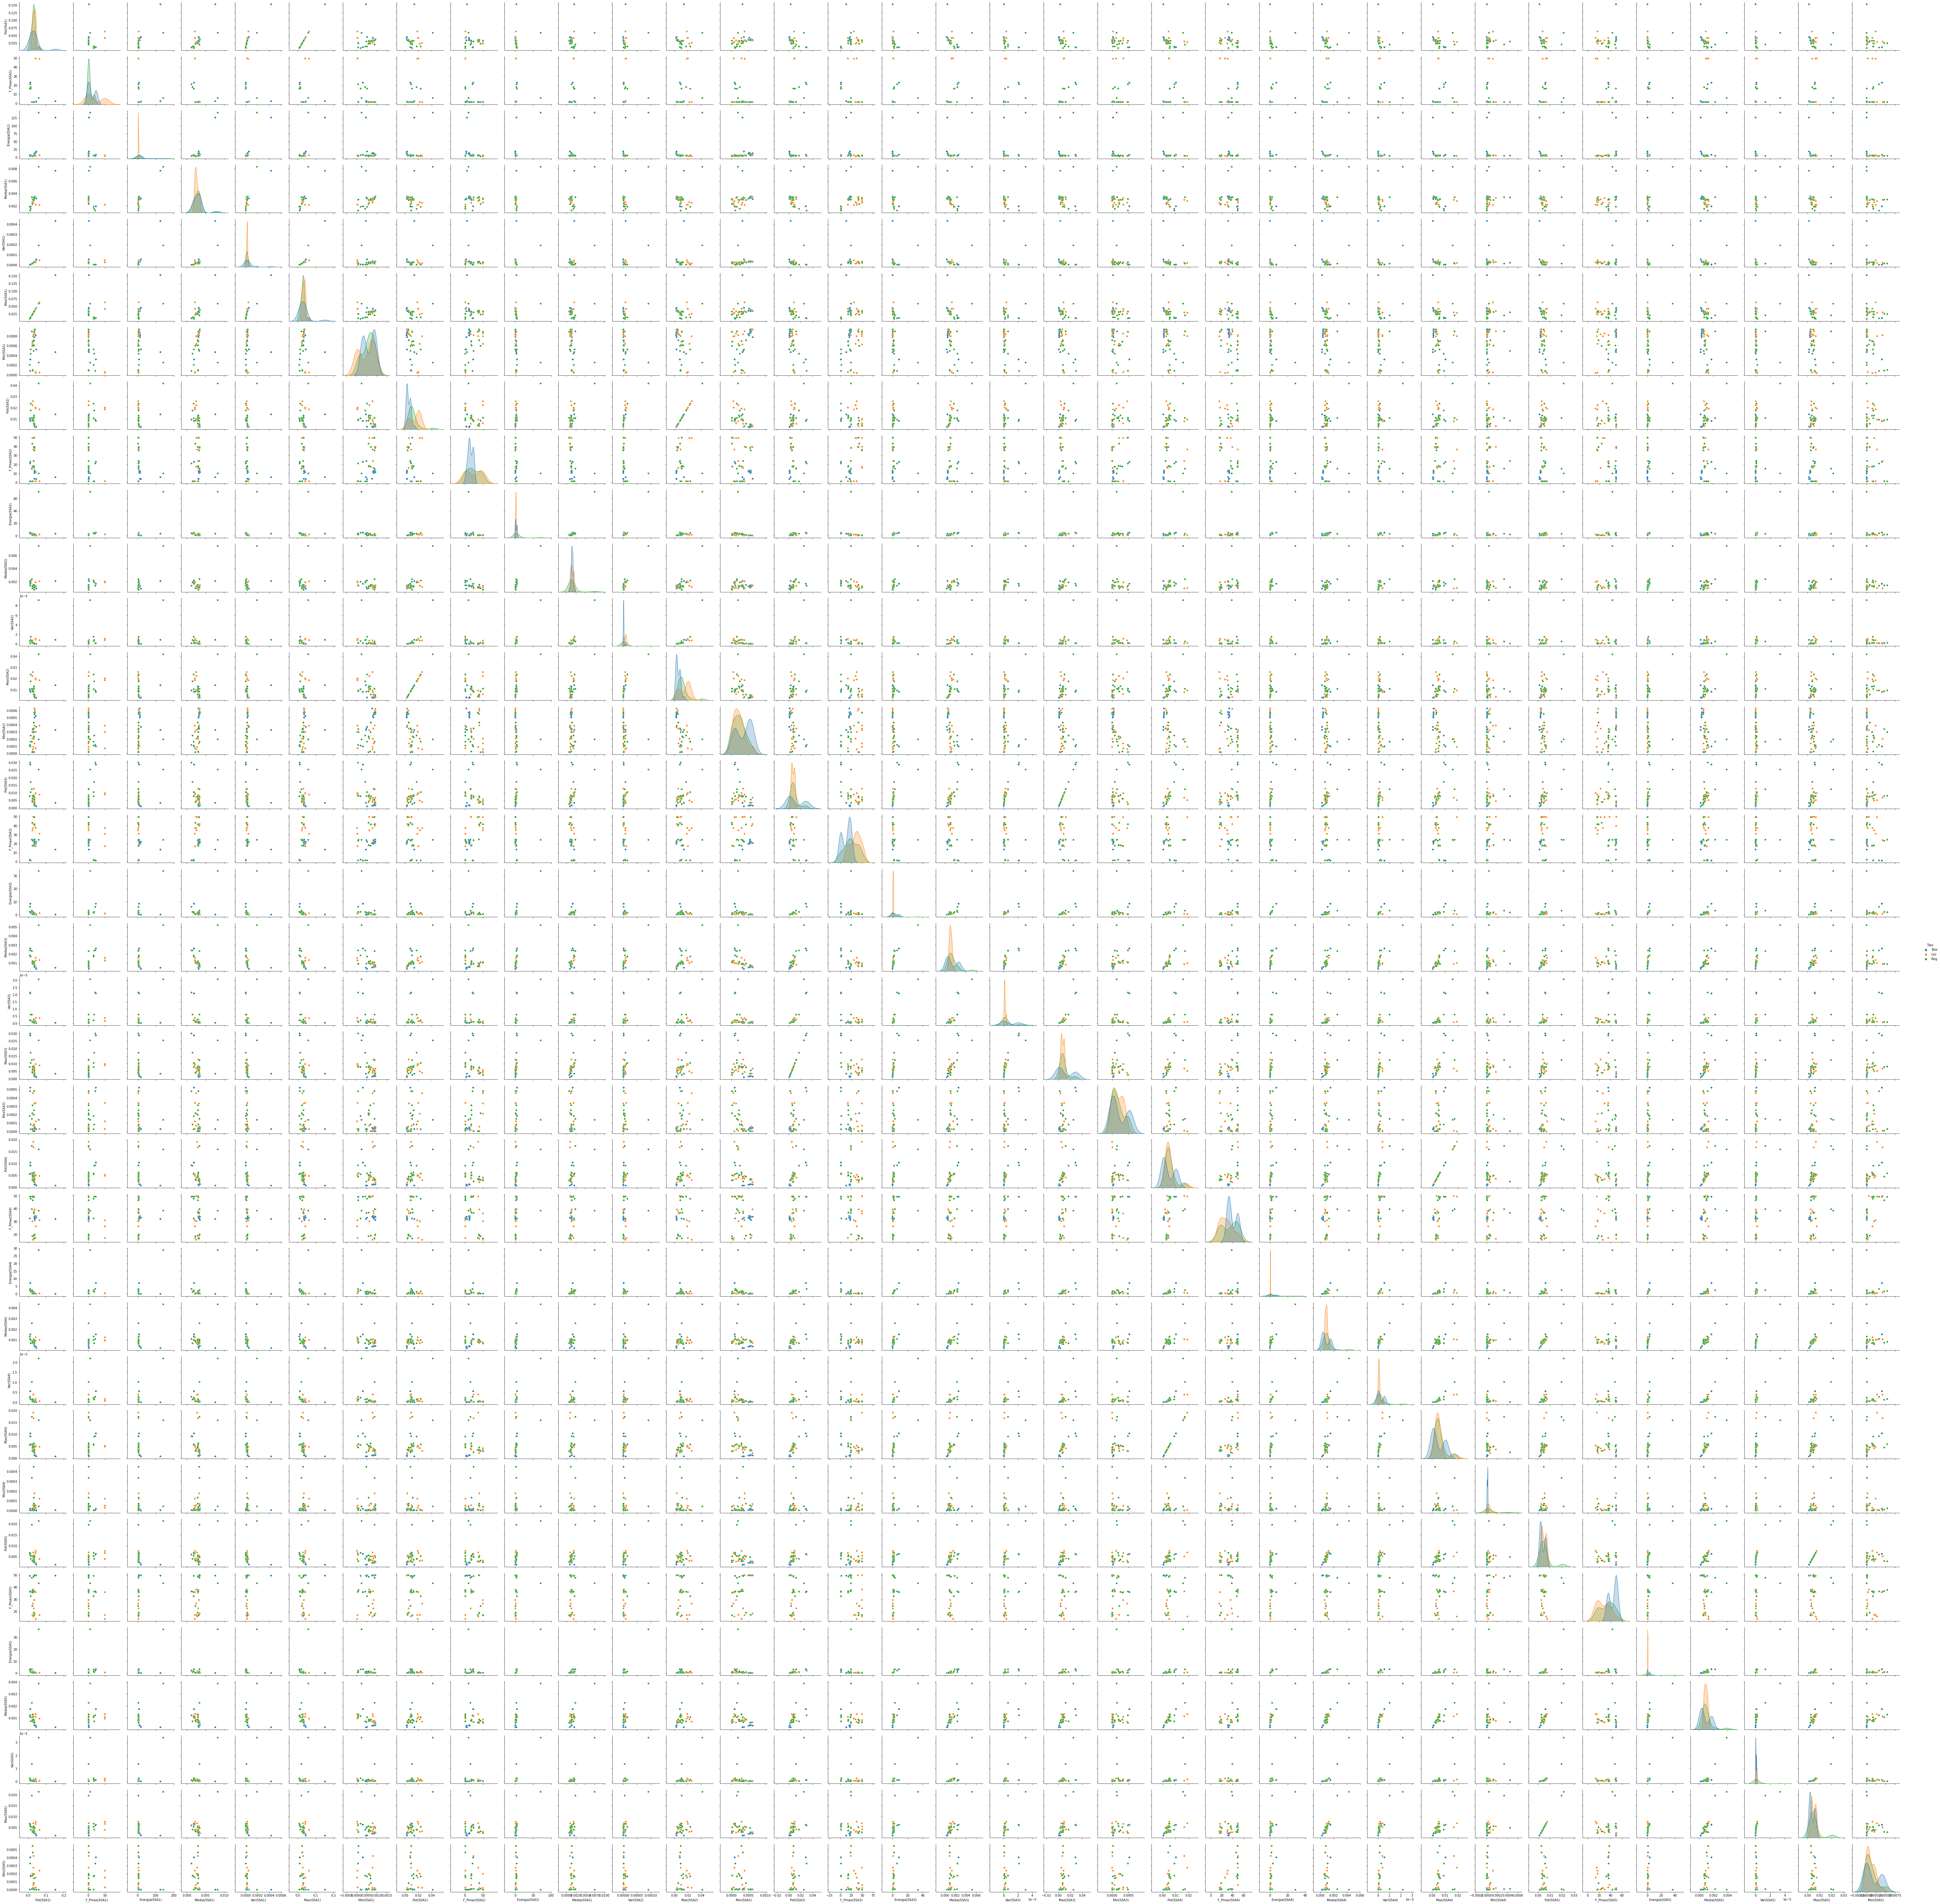

In [ ]:
sns.pairplot(df, hue="Tipo")

A partir del grafico obtenido, inicialmente se puede observar que este es de gran tamaño por la cantidad de señales subyacentes generadas y la cantidad de caracterísitcas extraidas. Al observar detenidamente los resultados, nos encontramos con que las graficas obtenidas no representan los datos de una forma tan agrupada como en el ejemplo de los pinguinos visto en clase, este comportamiento se puede deber a que solo se utilizaron cinco señales subyacentes o a que solo se extrajo una potencia máxima en vez de un conjunto de potencias, lo cual puede hacer que las características no se agrupen de una forma tan clara como en ejemplos vistos.

Dicho lo anterior, cabe mencionar que las características representadas presentan comportamientos que pueden servir como un primer paso para realizar algún tipo de clasificación, esto se puede apreciar inicialmente en las gaussianas de la diagonal, ya que se observa que en la mayoría de los casos estas son distinguibles entre sí y permiten representar la distribución por columna de los datos correspondientes a cada sismo. 

También se puede apreciar que  en algunas de las subgraficas generadas por el seaborn los puntos que representan las caracteristicas para cierto tipo de sismo, tienen comportamientos que pueden ser clasificables, por ejemplo en la fila 16, columna 34, vemos que los puntos azules (telesismo) tienden a ubicarse en zonas bajas, los puntos naranjas en zonas mas altas (sismo local) y los puntos verdes (sismo regional) se distribuyen de forma mas o menos pareja entre zonas altas, medias y bajas. Algunas de las otras subgráficas presentan comportamientos similares a estos, mientras que otras como la de la fila 1, columna 6, tienen comportamientos mas lineales. Es mediante estos comportamientos que se puede tener un cierto tipo de indicio de como en una futura actividad se podría realizar un mejor tipo de clasificación que nos permita agrupar las características de una mejor manera.


## Conclusiones
* Se pudo apreciar la importancia que implica realizar una correcta organización de los datos o características extraidas, para el correcto funcionamiento del sistema, ya que inicialmente estabamos organizando la matriz de una forma incorrecta, lo cual generó errores y no permitió realizar la correcta visualización del modelo implementado.
* Se pudo observar que aunque generalmente es deseable generar multiples señales subyacentes para poder extraer mas características, esto también puede conllevar a que la ejecución del programa sea extremadamente lenta, o incluso, puede ocurrir el caso en el que ante la gran cantidad de puntos en el grafico del seaborn, sea dificil distinguir a simple vista unos puntos de los otros.
* Mediante la extracción de características se encontró que en general, los telesismos tienen componentes de frecuencias mas altas comparados con los sismos locales y regionales, así mismo, la energia de estos telesismos en general fue mas alta; sin embargo en caracteristicas como la media, la potencia máxima y el mínimo del espectro, los sismos locales y regionales presentaron valores mas altos. A partir de lo anterior podemos afirmar que con el modelo implementado y las características extraidas, se tiene un buen primer acercamiento que nos permitirá tener buenas bases para comprender modelos mas complejos que permitan realizar clasificación de señales.